# Lambda School Data Science - Loading Data

Data comes in many shapes and sizes - we'll start by loading tabular data, usually in csv format.

Data set sources:

- https://archive.ics.uci.edu/ml/datasets.html
- https://github.com/awesomedata/awesome-public-datasets
- https://registry.opendata.aws/ (beyond scope for now, but good to be aware of)

Let's start with an example - [data about flags](https://archive.ics.uci.edu/ml/datasets/Flags).

## Lecture example - flag data

In [2]:
# Step 1 - find the actual file to download

# From navigating the page, clicking "Data Folder"
flag_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

# You can "shell out" in a notebook for more powerful tools
# https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html

# Funny extension, but on inspection looks like a csv
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data

# Extensions are just a norm! You have to inspect to be sure what something is

Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black
Anguilla,1,4,0,0,1,1,0,1,3,0,0,1,0,1,0,1,white,0,0,0,0,0,0,0,0,1,0,white,blue
Antigua-Barbuda,1,4,0,0,1,1,0,1,5,1,0,1,1,1,1,0,red,0,0,0,0,1,0,1,0,0,0,black,red
Argentina,2,3,2777,28,2,0,0,3,2,0,0,1,0,1,0,0,blue,0,0,0,0,0,0,0,0,0,0,blue,blue
Argentine,2,3,2777,28,2,0,0,3,3,0,0,1,1,1,0,0,blue,0,0,0,0,1,0,0,0,0,0,blue,blue
Australia,6,2,7690,15,1,1,0,0,3,1,0,1,0,1,0,0,blue,0,1,1,1,6,0,0,0,0,0,white,blue
Austria,3,1,84,8,4,0,0,3,2,1,0,0,0,1,0,0,red,0,0,0,0,0,0,0,0,0,0,red,red
Bahamas,1,4,19,0,1,1,0,3,3,0,0,1,1,0,1,0,blue,0,0,

In [0]:
# Step 2 - load the data

# How to deal with a csv? 🐼
import pandas as pd
flag_data = pd.read_csv(flag_data_url)

In [0]:
# Step 3 - verify we've got *something*
flag_data.head()

In [5]:
# Step 4 - Looks a bit odd - verify that it is what we want
flag_data.count()

Afghanistan    193
5              193
1              193
648            193
16             193
10             193
2              193
0              193
3              193
5.1            193
1.1            193
1.2            193
0.1            193
1.3            193
1.4            193
1.5            193
0.2            193
green          193
0.3            193
0.4            193
0.5            193
0.6            193
1.6            193
0.7            193
0.8            193
1.7            193
0.9            193
0.10           193
black          193
green.1        193
dtype: int64

In [6]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data | wc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15240  100 15240    0     0  53101      0 --:--:-- --:--:-- --:--:-- 52916
    194     194   15240


In [7]:
# So we have 193 observations with funny names, file has 194 rows
# Looks like the file has no header row, but read_csv assumes it does
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=None, compact_ints=None, use_unsigned=None, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)


In [8]:
# Alright, we can pass header=None to fix this
flag_data = pd.read_csv(flag_data_url, header=None)
flag_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [9]:
flag_data.count()

0     194
1     194
2     194
3     194
4     194
5     194
6     194
7     194
8     194
9     194
10    194
11    194
12    194
13    194
14    194
15    194
16    194
17    194
18    194
19    194
20    194
21    194
22    194
23    194
24    194
25    194
26    194
27    194
28    194
29    194
dtype: int64

In [10]:
flag_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

### Yes, but what does it *mean*?

This data is fairly nice - it was "donated" and is already "clean" (no missing values). But there are no variable names - so we have to look at the codebook (also from the site).

```
1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)
```

Exercise - read the help for `read_csv` and figure out how to load the data with the above variable names. One pitfall to note - with `header=None` pandas generated variable names starting from 0, but the above list starts from 1...

## Your assignment - pick a dataset and do something like the above

This is purposely open-ended - you can pick any data set you wish. It is highly advised you pick a dataset from UCI or a similar "clean" source.

If you get that done and want to try more challenging or exotic things, go for it! Use documentation as illustrated above, and follow the 20-minute rule (that is - ask for help if you're stuck).

If you have loaded a few traditional datasets, see the following section for suggested stretch goals.

In [0]:
# I'm going to do some mapping 
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

# first I'll pull in my libraries
import pandas as pd
import numpy as np



import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt


# Set the dispaly options to maximum
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [18]:
# Now I'll pull in my dataset, this one is a little weird, it's North Korean Misile tests

from google.colab import files
uploaded = files.upload()


Saving north_korea_missile_test_database.csv to north_korea_missile_test_database.csv


In [20]:
# Now I read the file into my dataframe

df = pd.read_csv('north_korea_missile_test_database.csv')
df.head()

,Date,Date Entered/Updated,Launch Time (UTC),Missile Name,Missile Type,Launch Agency/Authority,Facility Name,Facility Location,Other Name,Facility Latitude,Facility Longitude,Landing Location,Apogee,Distance Travelled,Confirmation Status,Test Outcome,Additional Information,Source(s)
0,9-Apr-84,23-Dec-16,NaN,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,Unknown,Unknown,Confirmed,Success,First known test by North Korea of a missile w...,http://www.nti.org/media/pdfs/north_korea_miss...
1,9-Apr-84,23-Dec-16,NaN,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,Unknown,Unknown,Confirmed,Success,NaN,http://www.nti.org/media/pdfs/north_korea_miss...
2,9-Apr-84,23-Dec-16,NaN,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,200 km,Unknown,Confirmed,Success,NaN,http://www.astronautix.com/g/gitdaeryung.html;...
3,Sep-84,23-Dec-16,NaN,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,Unknown,Unknown,Confirmed,Failure,NaN,"Joseph S. Bermudez, ""A History of Ballistic Mi..."
4,Sep-84,23-Dec-16,NaN,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,200 km,Unknown,Confirmed,Failure,NaN,http://www.astronautix.com/g/gitdaeryung.html;...


In [30]:
df.shape

(117, 18)

In [26]:
# now there is a lot of cleaning to be done
df.dtypes


Date                       object
Date Entered/Updated       object
Launch Time (UTC)          object
Missile Name               object
Missile Type               object
Launch Agency/Authority    object
Facility Name              object
Facility Location          object
Other Name                 object
Facility Latitude          object
Facility Longitude         object
Landing Location           object
Apogee                     object
Distance Travelled         object
Confirmation Status        object
Test Outcome               object
Additional Information     object
Source(s)                  object
dtype: object

In [27]:
df.isna().sum()

Date                         0
Date Entered/Updated         0
Launch Time (UTC)           77
Missile Name                 0
Missile Type                 0
Launch Agency/Authority    107
Facility Name                0
Facility Location            0
Other Name                  44
Facility Latitude            0
Facility Longitude           0
Landing Location            10
Apogee                      10
Distance Travelled          13
Confirmation Status          0
Test Outcome                 0
Additional Information      43
Source(s)                    0
dtype: int64

In [28]:
df.isnull().sum()

Date                         0
Date Entered/Updated         0
Launch Time (UTC)           77
Missile Name                 0
Missile Type                 0
Launch Agency/Authority    107
Facility Name                0
Facility Location            0
Other Name                  44
Facility Latitude            0
Facility Longitude           0
Landing Location            10
Apogee                      10
Distance Travelled          13
Confirmation Status          0
Test Outcome                 0
Additional Information      43
Source(s)                    0
dtype: int64

In [71]:
# First I'll clean the colum names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('/', '')

df.dtypes

date                      object
date_enteredupdated       object
launch_time_utc           object
missile_name              object
missile_type              object
launch_agencyauthority    object
facility_name             object
facility_location         object
other_name                object
facility_latitude         object
facility_longitude        object
landing_location          object
apogee                    object
distance_travelled        object
confirmation_status       object
test_outcome              object
additional_information    object
sources                   object
launchsites               object
dtype: object

In [95]:

# and remove unknowns
df_masked = df.replace('Unknown', np.nan)

# and drop NAN rows in the lat/long categories
df_masked = df_masked.dropna(subset=['facility_longitude', 'facility_latitude'])

# and convert to float
df_masked = df_masked[['facility_longitude', 'facility_latitude']].astype('float')


df_masked.facility_latitude.dtype



dtype('float64')

In [0]:
# I'm going to map the launch sites of this dataset. I'm going to see if we can figure out if some launch sites are more succesful than others. Since the North Korean regime is very strict, 
# the goal is to identify 'under performing' launch sites so the commanders in charge can be 'motivated' to increase their performance. The goal will be to visually represent the launch site and proportion of successful launches


df_masked['launchsites'] = list(zip(df_masked['facility_longitude'], df_masked['facility_latitude']))


In [88]:
df_masked['launchsites']

0      (129.666664, 40.8499966)
1      (129.666664, 40.8499966)
2      (129.666664, 40.8499966)
3      (129.666664, 40.8499966)
4      (129.666664, 40.8499966)
5      (129.666664, 40.8499966)
6      (129.666664, 40.8499966)
7      (129.666664, 40.8499966)
8      (129.666664, 40.8499966)
9          (126.6847, 38.62333)
10     (129.666664, 40.8499966)
11     (129.666664, 40.8499966)
12     (129.666664, 40.8499966)
13     (129.666664, 40.8499966)
14     (129.666664, 40.8499966)
15     (129.666664, 40.8499966)
16     (129.666664, 40.8499966)
17         (127.6236, 38.99083)
18         (127.6236, 38.99083)
19         (127.6236, 38.99083)
20         (127.6236, 38.99083)
21         (127.6236, 38.99083)
22         (127.6236, 38.99083)
23     (129.666664, 40.8499966)
24         (127.6236, 38.99083)
25         (127.6236, 38.99083)
26         (127.6236, 38.99083)
27         (127.6236, 38.99083)
28         (127.6236, 38.99083)
29         (127.6236, 38.99083)
30         (127.6236, 38.99083)
31      

In [0]:
# now these coordinates are converted to point

# df_masked.iloc[110]['launchsites']

df_masked['launchsites'] = df_masked['launchsites'].apply(Point)

In [103]:
# now I create a geo dataframe

gdf = geopandas.GeoDataFrame(df_masked, geometry = 'launchsites')

gdf.head

<bound method NDFrame.head of      facility_longitude  facility_latitude                    launchsites
0            129.666664          40.849997  POINT (129.666664 40.8499966)
1            129.666664          40.849997  POINT (129.666664 40.8499966)
2            129.666664          40.849997  POINT (129.666664 40.8499966)
3            129.666664          40.849997  POINT (129.666664 40.8499966)
4            129.666664          40.849997  POINT (129.666664 40.8499966)
5            129.666664          40.849997  POINT (129.666664 40.8499966)
6            129.666664          40.849997  POINT (129.666664 40.8499966)
7            129.666664          40.849997  POINT (129.666664 40.8499966)
8            129.666664          40.849997  POINT (129.666664 40.8499966)
9            126.684700          38.623330      POINT (126.6847 38.62333)
10           129.666664          40.849997  POINT (129.666664 40.8499966)
11           129.666664          40.849997  POINT (129.666664 40.8499966)
12      

In [116]:
# import fiona; fiona.supported_drivers


{'ARCGEN': 'r',
 'AeronavFAA': 'r',
 'BNA': 'raw',
 'CSV': 'raw',
 'DGN': 'raw',
 'DXF': 'raw',
 'ESRI Shapefile': 'raw',
 'ESRIJSON': 'r',
 'GML': 'raw',
 'GPKG': 'rw',
 'GPSTrackMaker': 'raw',
 'GPX': 'raw',
 'GeoJSON': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'OpenFileGDB': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

In [117]:
# I tried to import a map of korea here, it did not work. and I spent a lot of time learing about .shp .kmz formats for geospacial data but no luck
from google.colab import files
upload = files.upload()

Saving 794966.gml to 794966.gml


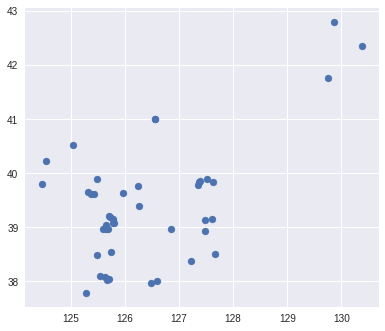

In [123]:
map_korea = geopandas.read_file('794966.gml')
map_korea.plot()

In [126]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

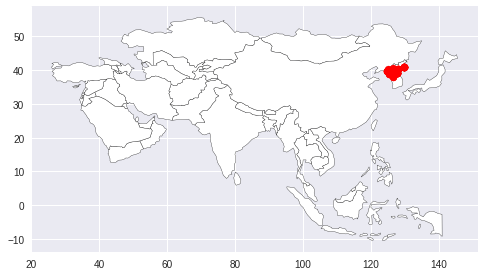

In [125]:
# Now I plot it over a map of Korea

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


# We restrict to east asia.
ax = world[world.continent == 'Asia'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()

So my initial task turned out to be much harder than I expected and I didn't manage to create a cool graphic of north korean launchsites and their success rates, but I did convert the launch site coordinants and project them on a map, so that's something.

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.